In [51]:
#Linzy Programming Revision - Python
#import modules needed to execute functions
#standard modules
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import csv
import sys
import random
import os
from pandas import DataFrame
from ranges import RangeDict, Range
#%matplotlib inline
plt.rcParams['figure.figsize']=(15,6)

#data preprocessing modules
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

#model modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#metric modules
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

#get current working directory
os.getcwd()

'C:\\Users\\Lakys\\Documents'

In [52]:
#import data from DAT650
def dataset(path_filename):
	#insert import error if file does not exist or type is not CSV
	try:
		data=pd.read_csv(path_filename, encoding='latin1')
		return data
	except IOError:
		print ('File does not exist or file type is not CSV.')
		sys.exit(1)

#list path and file name for data to import
original_data=dataset('affair.csv')
#original_data

In [53]:
od=original_data.iloc[:,1:]

In [54]:
od.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,had_affair
0,0,male,37.0,10.00,no,3,18,7,4,no
1,0,female,27.0,4.00,no,4,14,6,4,no
2,0,female,32.0,15.00,yes,1,12,1,4,no
3,0,male,57.0,15.00,yes,5,18,6,5,no
4,0,male,22.0,0.75,no,2,17,6,3,no


In [55]:
sortbycolumn = list(od.columns)
random.shuffle(sortbycolumn)
sortbycolumn=sortbycolumn[0]

In [56]:
od=od.sort_values(by=sortbycolumn).reset_index().iloc[:,1:]
od.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,had_affair
0,2,female,27.0,4.0,no,1,17,3,1,yes
1,0,male,32.0,4.0,yes,1,18,6,4,no
2,7,female,37.0,10.0,no,1,20,5,3,yes
3,0,male,32.0,15.0,yes,1,16,5,5,no
4,0,male,22.0,1.5,yes,1,14,3,5,no


In [58]:
od["had_affair"].value_counts()

had_affair
no     451
yes    150
Name: count, dtype: int64

In [7]:
dep_variable=od["had_affair"]

In [8]:
od=od.drop("had_affair", axis=1)

In [9]:
od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   affairs        601 non-null    int64  
 1   gender         601 non-null    object 
 2   age            601 non-null    float64
 3   yearsmarried   601 non-null    float64
 4   children       601 non-null    object 
 5   religiousness  601 non-null    int64  
 6   education      601 non-null    int64  
 7   occupation     601 non-null    int64  
 8   rating         601 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 42.4+ KB


In [10]:
#str_columns=[]
#for i in od.columns:
#    if type(od[i][0])==str:
#        str_columns.append(i)

In [11]:
#str_columns

In [12]:
#create dummies for categorical columnns; including prefix to reference original feature
#def dummies(feature):
#	dummy_feature=pd.get_dummies(feature,
#	prefix=feature.name, dtype=int)
#	return dummy_feature

In [13]:
#dummy_variables=[]
#for i in str_columns:
#    dummy_variables.append(dummies(od[i]))  

In [14]:
#str_dict={}
#for i in range(len(dummy_variables)):
#    for p in dummy_variables[i].columns:
#        str_dict[p]=dummy_variables[i][p]

In [15]:
encoding_dict={"female":"0", "male":"1", "yes":"1","no":"0"}

In [16]:
gdr=[encoding_dict[i] for i in od["gender"]]
chldrn=[encoding_dict[i] for i in od["children"]]

In [17]:
df=pd.concat([pd.Series(gdr, name="gender"), pd.Series(chldrn, name="children")], axis=1)

In [18]:
nonstr_columns=[]
for i in od.columns:
    if type(od[i][0])!=str:
        nonstr_columns.append(i)

In [19]:
nonstr_columns

['affairs',
 'age',
 'yearsmarried',
 'religiousness',
 'education',
 'occupation',
 'rating']

In [20]:
max_values=[]
for i in nonstr_columns:
    max_values.append(np.max(np.array(od[i])))

In [21]:
max_values

[12, 57.0, 15.0, 5, 20, 7, 5]

In [22]:
range_dict=[]
for i in max_values:
    quartiles=[]
    quartiles.append(0)
    quartiles.append(round((i/2)/2))
    quartiles.append(round(i/2))
    quartiles.append(round(i-((i/2))/2))
    quartiles.append(i)
    range_dict.append(quartiles)               

In [23]:
range_dict

[[0, 3, 6, 9, 12],
 [0, 14, 28, 43, 57.0],
 [0, 4, 8, 11, 15.0],
 [0, 1, 2, 4, 5],
 [0, 5, 10, 15, 20],
 [0, 2, 4, 5, 7],
 [0, 1, 2, 4, 5]]

In [24]:
continous_variables=[]
for i in range_dict:
    continous_variables.append(RangeDict({Range(i[0],i[1]):1,Range(i[1],i[2]):2,Range(i[2],i[3]):3,Range(i[3],i[4]+1):4}))

In [25]:
continous_variables

[RangeDict{RangeSet{Range[0, 3)}: 1, RangeSet{Range[3, 6)}: 2, RangeSet{Range[6, 9)}: 3, RangeSet{Range[9, 13)}: 4},
 RangeDict{RangeSet{Range[0, 14)}: 1, RangeSet{Range[14, 28)}: 2, RangeSet{Range[28, 43)}: 3, RangeSet{Range[43, 58.0)}: 4},
 RangeDict{RangeSet{Range[0, 4)}: 1, RangeSet{Range[4, 8)}: 2, RangeSet{Range[8, 11)}: 3, RangeSet{Range[11, 16.0)}: 4},
 RangeDict{RangeSet{Range[0, 1)}: 1, RangeSet{Range[1, 2)}: 2, RangeSet{Range[2, 4)}: 3, RangeSet{Range[4, 6)}: 4},
 RangeDict{RangeSet{Range[0, 5)}: 1, RangeSet{Range[5, 10)}: 2, RangeSet{Range[10, 15)}: 3, RangeSet{Range[15, 21)}: 4},
 RangeDict{RangeSet{Range[0, 2)}: 1, RangeSet{Range[2, 4)}: 2, RangeSet{Range[4, 5)}: 3, RangeSet{Range[5, 8)}: 4},
 RangeDict{RangeSet{Range[0, 1)}: 1, RangeSet{Range[1, 2)}: 2, RangeSet{Range[2, 4)}: 3, RangeSet{Range[4, 6)}: 4}]

In [26]:
for i,k in zip(continous_variables,nonstr_columns):
    df[k]=[i[p] for p in od[k]]

In [27]:
le = LabelEncoder()
le.fit(dep_variable)
labels=dict(zip(set(dep_variable), set(le.transform(dep_variable))))

In [28]:
df["had_affair"]=[labels[i] for i in dep_variable]
df

,gender,children,affairs,age,yearsmarried,religiousness,education,occupation,rating,had_affair
0,1,0,1,3,3,3,4,4,4,0
1,1,0,1,3,2,3,3,3,4,0
2,1,1,1,3,4,4,4,4,3,0
3,0,0,1,3,1,4,3,2,3,0
4,1,1,1,3,3,4,4,3,4,0
...,...,...,...,...,...,...,...,...,...,...
596,1,1,4,3,2,3,3,3,3,1
597,0,1,4,3,4,2,4,4,4,1
598,0,1,4,3,4,4,3,1,3,1
599,0,1,4,3,3,3,4,4,4,1


In [29]:
#create data variables for independent features. Ouput variable count
def independent_variables(data, target_column):
	ind_var = (data.drop(target_column, axis=1))
	return ind_var

independent_variable=independent_variables(df, "had_affair")
#len(independent_variable.columns)

#create a list of feature names for independent variables to be used for labeling later
ind_var_list=list(independent_variable.columns)

#create data variables for dependent features
def dependent_variables(target_column):
	dep_var = (target_column)
	return dep_var

dependent_variable=dependent_variables(df[["had_affair"]])
#dependent_variable.columns

#split independent and depentent features into a training set(70%) and a testing set(30%)
train_features, test_features, train_labels, test_labels = train_test_split(independent_variable,
dependent_variable,test_size = 0.30,random_state = 42)

In [30]:
train_features

,gender,children,affairs,age,yearsmarried,religiousness,education,occupation,rating
272,1,1,1,4,4,4,4,4,3
600,1,1,4,2,2,3,4,4,4
479,0,1,1,3,3,4,4,1,4
436,0,1,1,4,4,4,4,1,2
383,0,1,1,3,4,3,3,2,3
...,...,...,...,...,...,...,...,...,...
71,0,1,1,4,4,4,2,4,4
106,0,1,1,2,2,3,4,1,4
270,0,1,1,3,4,4,3,1,4
435,1,1,1,2,2,4,3,4,3


In [31]:
train_labels

,had_affair
272,0
600,1
479,1
436,0
383,0
...,...
71,0
106,0
270,0
435,0


In [32]:
def classifier_scoring (train_feature, test_feature, train_label, test_label):
	"""
	build a list of classifiers to be used in pipeline for multi model scoring that will be used
	to select top model
	"""
	classifiers = [
	RandomForestClassifier(random_state=42),
	SVC(random_state=42),
	GradientBoostingClassifier(random_state=42),
	LogisticRegression(random_state=42)
	]
	"""
	build pipeline for the 4 classifiers and print cross validation scores
	output is a list of 4 scores in decimal form, "Scores 0.7165805316291562"
	"""
	scores=[]
	for i in classifiers:
		pipe = Pipeline(steps=[('classifier', i)])
		pi=pipe.fit(train_features, train_labels)
		scores.append(cross_val_score(pi, test_features, test_labels, cv=5,
		verbose=True).mean())
	return ["Random Forest", "SVC", "Gradient Boosting",
	"Logistic Regression"], scores

In [33]:
score_results=classifier_scoring(train_features, test_features,
	train_labels, test_labels)

In [34]:
pd.concat([pd.Series(score_results[0], name="model"), pd.Series(score_results[1], name="score")], axis=1).sort_values(by="score", ascending=False)

,model,score
1,SVC,0.944595
3,Logistic Regression,0.944595
0,Random Forest,0.927928
2,Gradient Boosting,0.927928


In [35]:
def predct (model):
	predictions = model.predict(test_features)
	predictions = predictions.reshape((predictions.shape[0], 1))
	return predictions

In [36]:
"""
Create subset training set for the logistic regression model.
"It is important to train the ensemble of trees on a different subset
of the training data than the linear regression model to avoid
overfitting, in particular if the total number of leaves is
similar to the number of training samples" (Pedregosa et al, 2011)
"""
#create and fit the subset training data on logistic regression model
rt_lm = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
rt_lm.fit(train_features, train_labels)

#Use previous created function to produce binary predictions
lg_model=predct(rt_lm)

#incorporate prediction results into the confusion matrix and generate metric reports
tree_confusionlr=confusion_matrix(test_labels, lg_model)

In [59]:
tree_confusionlr

array([[139,   0],
       [  9,  33]], dtype=int64)

In [37]:
import joblib
joblib.dump(rt_lm, 'rt_lm.pkl')

['rt_lm.pkl']

In [38]:
print("Logistic Regression Confusion Matrix: {}".format(tree_confusionlr))
tree_class_reportlr=classification_report(test_labels, lg_model)

print(tree_class_reportlr)

Logistic Regression Confusion Matrix: [[139   0]
 [  9  33]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       139
           1       1.00      0.79      0.88        42

    accuracy                           0.95       181
   macro avg       0.97      0.89      0.92       181
weighted avg       0.95      0.95      0.95       181



In [39]:
"""
create metric function that calculates accuracy, missclassifications, precision,
sensitivity based on the results of the confusion matrix. Output is a list with
values for each metric in the format ('Precision: [0.33]', 'Sensitivity: [0.714]'), etc...
"""
def metric (confusion_matrix):
	#add exception to state that if error here, then confusion matrix format changed
	try:
		cm1=np.split(confusion_matrix[0],2)
		cm2=np.split(confusion_matrix[1],2)
		tn=cm1[0]
		fn=cm1[1]
		fp=cm2[0]
		tp=cm2[1]
		accuracy=(tn+tp)/(tn+fn+fp+tp)
		missclass=(fn+fp)/(tn+fn+fp+tp)
		precision=tp/(fp+tp)
		sensitivity=tp/(fn+tp)
	except TypeError:
		print("Problem with confusion matrix. Fix format!")
	else:
		pass

	return ["Accuracy: {}".format(np.round(accuracy,3)),
	"Missclassification: {}".format(np.round(missclass,3)),
	"Precision: {}".format(np.round(precision, 3)),
	"Sensitivity: {}".format(np.round(sensitivity, 3))]

In [40]:
"""
Using previous function created, calculate accuracy, missclassifications, precision,
sensitivity based on the results of the confusion matrix. Output is a list with
values for each metric in the format ('Precision: [0.429]', 'Sensitivity: [0.696]'), etc...
"""

print(metric(tree_confusionlr))

['Accuracy: [0.95]', 'Missclassification: [0.05]', 'Precision: [0.786]', 'Sensitivity: [1.]']


In [41]:
"""
Create a function to get a list of the top 5 importance features based on model results, and
chart importance features. Output is a list of important features with their
importance values. Importance value calculate with built-in model feature_importance_.
The chart is a bar chart.
"""
# Get numerical feature importances
def important_list (var_list, importances):
	# List of tuples with variable and importance
	feature_importances = [(feature, round(importance, 2)) for feature,
	importance in zip(var_list, importances)]
	# Sort the feature importances by most important first
	feature_importances = sorted(feature_importances,
	key = lambda x: x[1], reverse = True)
	# list of x locations for plotting
	x_values = list(range(len(importances)))
	return[ # Make a bar chart
	plt.bar(x_values, importances, orientation = 'vertical',
	color = 'r', edgecolor = 'k', linewidth = 1.2),
	# Tick labels for x axis
	plt.xticks(x_values, var_list, rotation='vertical'),
	# Axis labels and title
	plt.ylabel('Importance'), plt.xlabel('Variable'), plt.title('Variable Importances'),
	feature_importances[0:5]]

[<BarContainer object of 9 artists>,
 ([<matplotlib.axis.XTick at 0x1d1cc822bd0>,
  [Text(0, 0, 'gender'),
   Text(1, 0, 'children'),
   Text(2, 0, 'affairs'),
   Text(3, 0, 'age'),
   Text(4, 0, 'yearsmarried'),
   Text(5, 0, 'religiousness'),
   Text(6, 0, 'education'),
   Text(7, 0, 'occupation'),
   Text(8, 0, 'rating')]),
 Text(0, 0.5, 'Importance'),
 Text(0.5, 0, 'Variable'),
 Text(0.5, 1.0, 'Variable Importances'),
 [('affairs', 3.35),
  ('children', 0.79),
  ('rating', 0.74),
  ('gender', 0.64),
  ('age', 0.53)]]

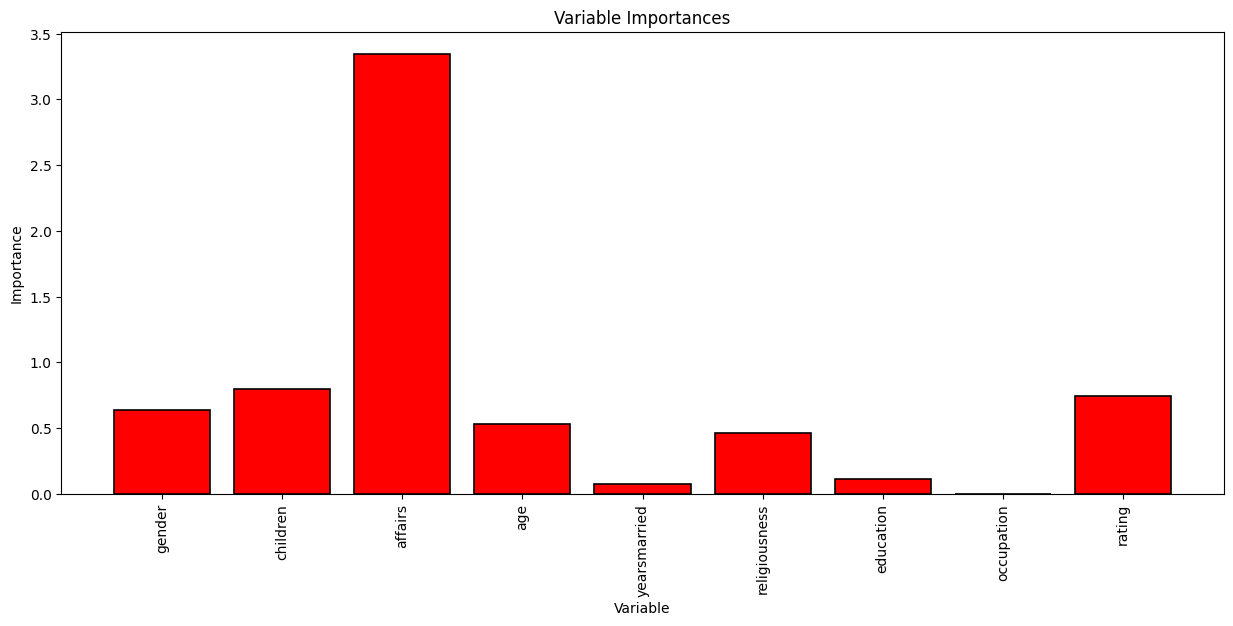

In [42]:
"""
Using previous function created, get a list of the top 5 importance
features based on model results, and chart importance features.
Output is a list of important features with their
importance values. Importance value calculate with built-in model feature_importance_.
The chart is a bar chart.
Transform and get numerical feature importances. Shape was modified to accomodate
unique features of the logistic regression model
"""

lg_coef=rt_lm.coef_.transpose()
lg_coef=lg_coef.reshape(lg_coef.shape[0], )
lg_importances = list(abs(lg_coef))
results=important_list(ind_var_list,lg_importances)
results

In [43]:
#create variables for prediction probabilities for each model
y_pred_rt = rt_lm.predict_proba(test_features)[:,1]
#Create variables for precision/recall curve using predicted probability variables with test labels
fpr_rt_lm2, tpr_rt_lm2, _ = precision_recall_curve(test_labels, y_pred_rt)

In [44]:
"""
Calculate average precision/recall score for each model and plot
and plot the precision/recall curve for each model using
precision/recall score for labeling. Out put for scores are
("RF Average Precision/Recall Score 0.6331",
"LG Average Precision/Recall Score 0.5289"), etc...
"""

print("LG Average Precision/Recall Score {}".format(round(average_precision_score(test_labels, y_pred_rt),4)))

LG Average Precision/Recall Score 0.8699


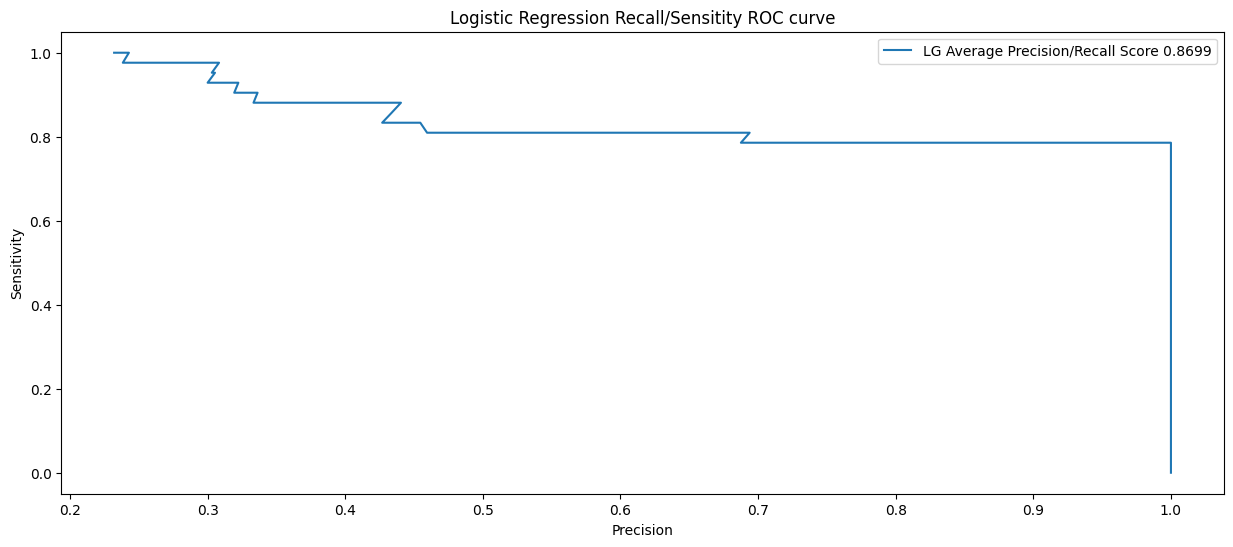

In [45]:
plt.figure(1)
#plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm2, tpr_rt_lm2, label="LG Average Precision/Recall Score {}".format(round(average_precision_score(test_labels, y_pred_rt),4)))
plt.xlabel('Precision')
plt.ylabel('Sensitivity')
plt.title('Logistic Regression Recall/Sensitity ROC curve')
plt.legend(loc='best')
plt.show()

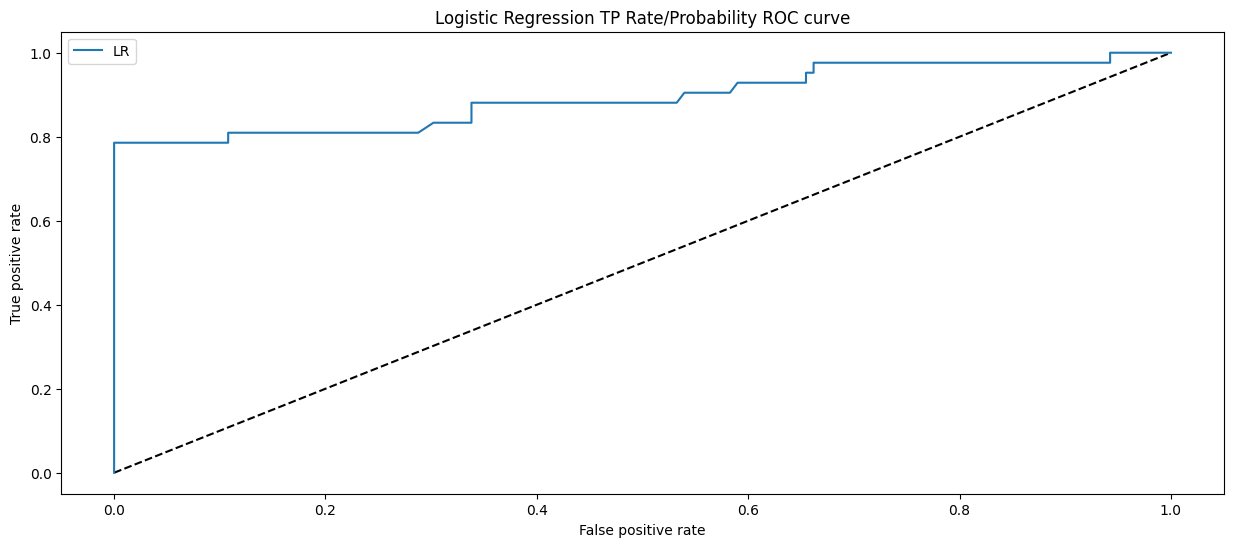

In [46]:
#create variables for ROC curve for each model
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(test_labels, y_pred_rt)

"""
Plot the precision/recall curve for each model
"""
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='LR')#.format(round(roc_auc_score(test_labels, y_pred_rt), 4)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression TP Rate/Probability ROC curve')
plt.legend(loc='best')
plt.show()

In [47]:
"""
print ROC_AUC scores
"""
print("LG ROC Score {}".format(round(roc_auc_score(test_labels,y_pred_rt), 4)))

LG ROC Score 0.8938


In [48]:
featuresforreview=[i[0] for i in results[-1]]
featuresforreview

['affairs', 'children', 'rating', 'gender', 'age']

In [49]:
for i in od.columns:
    print(od[i].value_counts())

affairs
0     451
7      42
12     38
1      34
3      19
2      17
Name: count, dtype: int64
gender
female    315
male      286
Name: count, dtype: int64
age
27.0    153
22.0    117
32.0    115
37.0     88
42.0     56
47.0     23
57.0     22
52.0     21
17.5      6
Name: count, dtype: int64
yearsmarried
15.000    204
4.000     105
1.500      88
7.000      82
10.000     70
0.750      31
0.125      11
0.417      10
Name: count, dtype: int64
children
yes    430
no     171
Name: count, dtype: int64
religiousness
4    190
2    164
3    129
5     70
1     48
Name: count, dtype: int64
education
14    154
16    115
18    112
17     89
20     80
12     44
9       7
Name: count, dtype: int64
occupation
5    204
6    143
1    113
4     68
3     47
7     13
2     13
Name: count, dtype: int64
rating
5    232
4    194
3     93
2     66
1     16
Name: count, dtype: int64
